In [1]:
import os
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}
finance_tickers = ['BAC', 'JPM', 'USB', 'ING', 'GS', 'UBS', 'SCHW', 'XLF', 'BBVA', 'PNC']
food_tickers = ['CPB', 'GIS', 'CAG', 'K', 'SJM', 'POST', 'PFGC', 'HRL']


for tick in finance_tickers:
    url = web_url + tick
    req = Request(url=url,headers={"User-Agent": "Chrome"})
    response = urlopen(req)
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        if i.a is not None:
          text = i.a.get_text()

        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]

        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]

        news_list.append([tick, date, time, text])

C:\Users\kevin\AppData\Local\Temp\ipykernel_1396\1212036179.py:18: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for i in news_table.findAll('tr'):


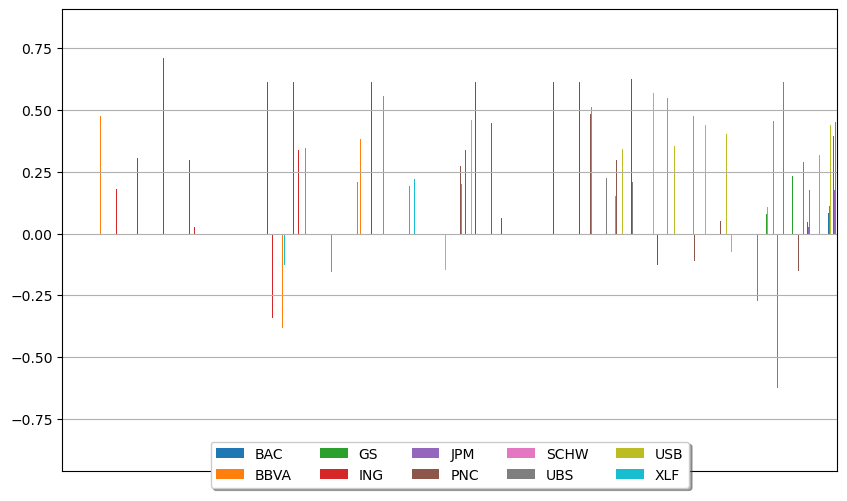

In [ ]:
parse_date = lambda date_str: pd.to_datetime(date_str.lower()).date()

vader = SentimentIntensityAnalyzer()
columns = ['ticker', 'date', 'time', 'headline']
news_df = pd.DataFrame(news_list, columns=columns)
scores = news_df['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
news_df = news_df.join(scores_df, rsuffix='_right')
news_df['date'] = news_df["date"].apply(parse_date)#news_df['date'] = pd.to_datetime(news_df.date).dt.date
plt.rcParams['figure.figsize'] = [10, 6]
mean_scores = news_df.drop(["time","headline"],axis=1).groupby(['ticker','date']).mean()#mean_scores = news_df.groupby(['ticker','date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
mean_scores.plot(kind = 'bar')
plt.grid()
plt.xticks([])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [4]:
news_df

,ticker,date,time,headline,neg,neu,pos,compound
0,BAC,2025-07-30,10:32AM,"Confronted with Higher Living Costs, 72% of Yo...",0.068,0.714,0.218,0.6124
1,BAC,2025-07-30,10:24AM,Wells Fargo joins Wall Street chorus in liftin...,0.000,0.846,0.154,0.2500
2,BAC,2025-07-30,03:37AM,"Jim Cramer on Bank of America: ""Be Sure to Do ...",0.000,0.827,0.173,0.3182
3,BAC,2025-07-29,02:32PM,Warren Buffetts Berkshire Hathaway Now Earns $...,0.000,1.000,0.000,0.0000
4,BAC,2025-07-29,10:09AM,Bank of America vs. PNC Financial: Which Bank ...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
1025,PNC,2025-04-15,01:10PM,"The PNC Financial Services Group, Inc. (PNC) Q...",0.000,1.000,0.000,0.0000
1026,PNC,2025-04-15,12:32PM,Stock Market Today: Dow Jones Lags While Netfl...,0.116,0.884,0.000,-0.3612
1027,PNC,2025-04-15,09:46AM,PNC Financial Q1 Earnings Top Estimates on Ris...,0.000,0.859,0.141,0.2023
1028,PNC,2025-04-15,09:30AM,The PNC Financial Services Group (PNC) Q1 Earn...,0.000,1.000,0.000,0.0000


Explatory Data Analysis-
1. Look at the number of observations in each class. Determine if there is a class imbalance. Discuss how a class imbalance can affect the model you are using. 